# Amasya İli İlçelerinde Elektrik Tüketim ve Ödeme Davranışlarının Analizi

## Notebook_02: Veri Görselleştirme

### 1. Veri Yükleme

In [1]:
import pandas as pd
import numpy as np

file_path = "elektrik_veri_hashed.xlsx"
xls = pd.ExcelFile(file_path)

print("Sayfa İsimleri: " , xls.sheet_names)

df_tahsilat = pd.read_excel(xls, sheet_name="Tahsilat")       # ödeme işlemleri
df_tahsilat_1 = pd.read_excel(xls, sheet_name="Tahsilat 1")   # fatura işlemleri
df_tahakkuk = pd.read_excel(xls, sheet_name="Tahakkuk")       # Hamamözü
df_tahakkuk_1 = pd.read_excel(xls, sheet_name="Tahakkuk 1")   # Gümüşhacıköy
df_tahakkuk_2 = pd.read_excel(xls, sheet_name="Tahakkuk 2")   # Göynücek

df_tahakkuk_all=pd.concat([df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2], ignore_index=True)

Sayfa İsimleri:  ['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']


### 2. Üç İlçenin Hesap Sınıfı Dağılımları

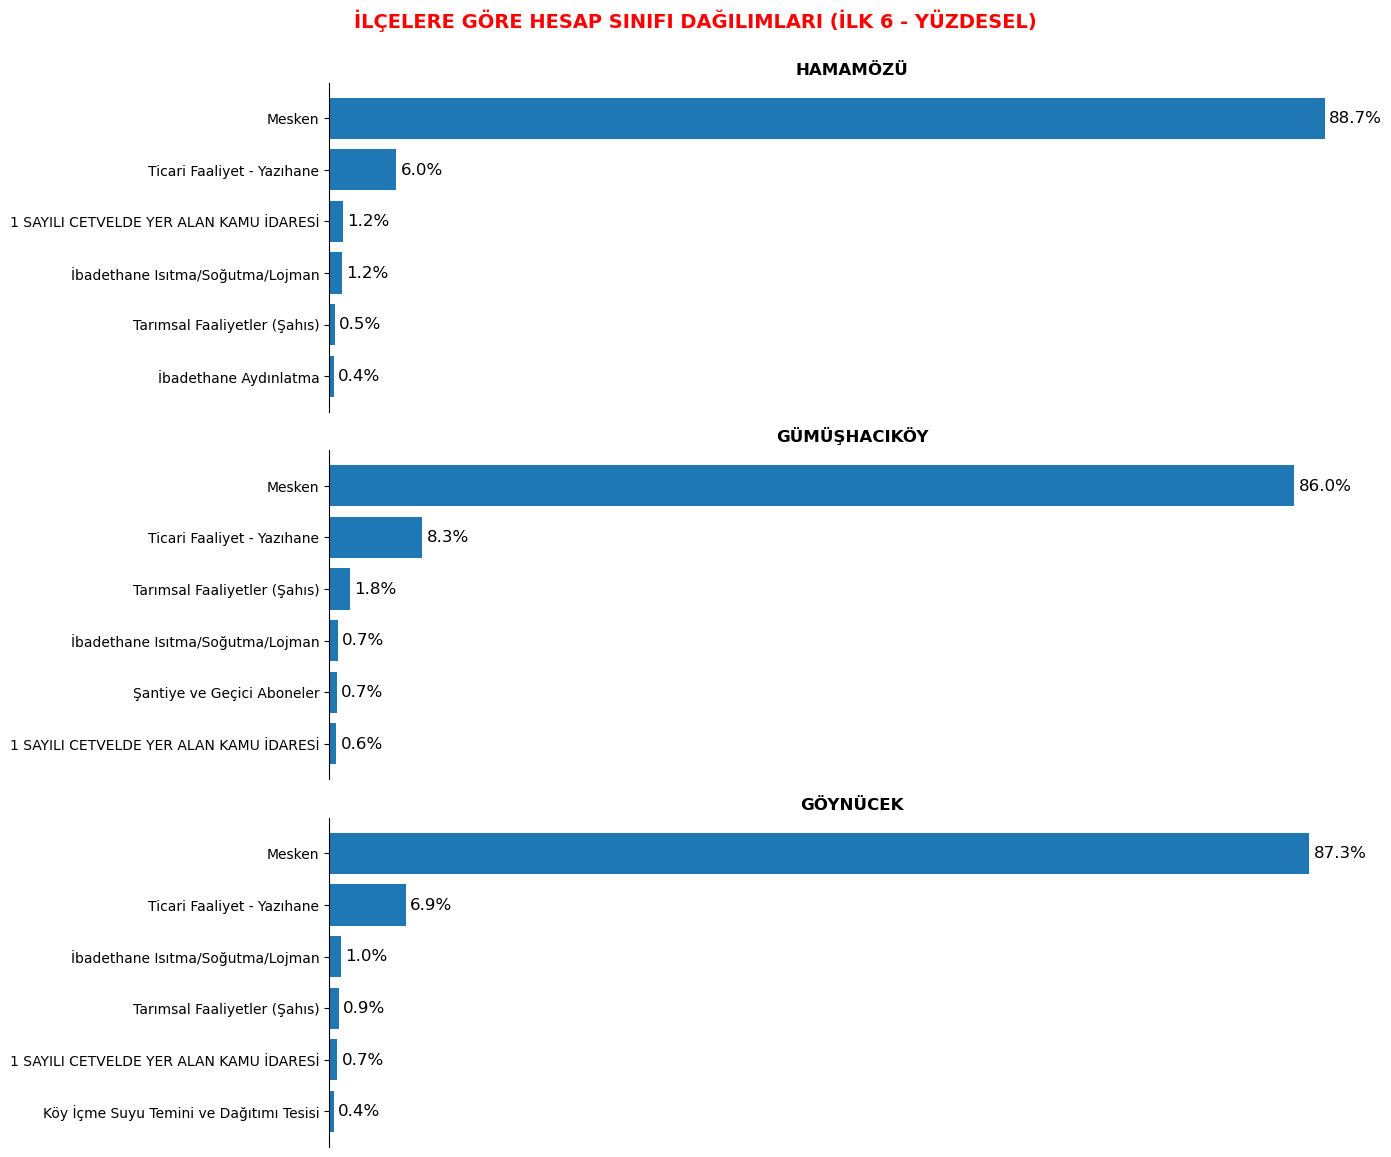

In [2]:
import matplotlib.pyplot as plt

ilceler = df_tahakkuk_all["ilce"].unique()

fig,axes = plt.subplots(3,1, figsize=(14,12), sharex=True)

for ax, ilce in zip(axes, ilceler):
    data = df_tahakkuk_all[df_tahakkuk_all["ilce"]==ilce]["Hesap Sınıfı"].value_counts(normalize=True).head(6)*100
    
    data = data.sort_values()
    bars = ax.barh(data.index, data.values)
    ax.set_title(ilce, fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.bar_label(bars, fmt="%.1f%%", padding=3,fontsize=12)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
        
plt.suptitle("İLÇELERE GÖRE HESAP SINIFI DAĞILIMLARI (İLK 6 - YÜZDESEL)", fontsize=14, fontweight="bold", horizontalalignment="center",color="r")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.xticks([])
plt.show()

### 3. İlçelere Göre Aylık Ortalama Elektrik Tüketimi - Mevsimsel Trend

In [3]:
# mevsimsel analiz için tarih dönüşümü
df_tahakkuk_all["mali_yil_donem"] = pd.to_datetime(df_tahakkuk_all["mali_yil_donem"])
df_tahakkuk_all["ay"] = df_tahakkuk_all["mali_yil_donem"].dt.month
df_tahakkuk_all[["mali_yil_donem","ay"]].head()

,mali_yil_donem,ay
0,2023-01-01,1
1,2023-01-01,1
2,2023-02-01,2
3,2023-02-01,2
4,2023-03-01,3


In [4]:
# aylık ortalama kwh tüketimi
aylik_ort_kwh = df_tahakkuk_all.groupby(["ilce","ay"])["kwh"].agg("mean").reset_index()
aylik_ort_kwh = aylik_ort_kwh.round(2)
aylik_ort_kwh.head()

,ilce,ay,kwh
0,GÖYNÜCEK,1,71.73
1,GÖYNÜCEK,2,66.22
2,GÖYNÜCEK,3,75.58
3,GÖYNÜCEK,4,79.91
4,GÖYNÜCEK,5,77.44


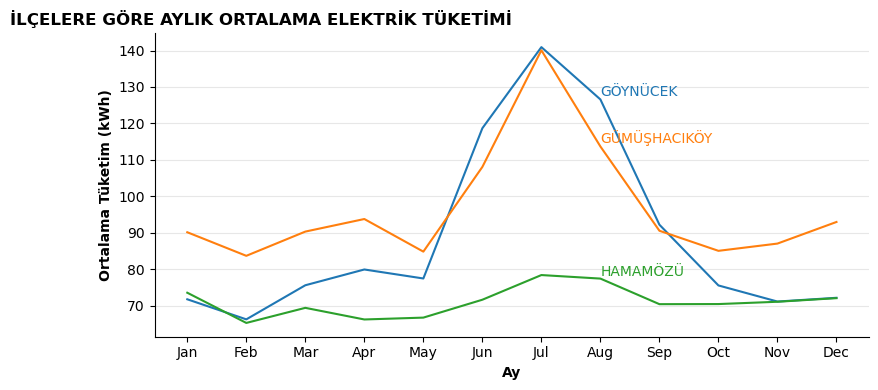

In [5]:
import matplotlib.pyplot as plt
import calendar

plt.figure(figsize=(8,4))
ax=plt.gca()
for ilce in aylik_ort_kwh["ilce"].unique():
    data1 = aylik_ort_kwh[aylik_ort_kwh["ilce"] == ilce]
    line,=plt.plot(data1["ay"], data1["kwh"], label = ilce)
    ax.text(data1["ay"].iloc[-5],data1["kwh"].iloc[-5],ilce,va="bottom",ha="left", color=line.get_color() )
plt.xticks(range(1, 13), calendar.month_abbr[1:13])
plt.xlabel("Ay", fontweight="bold")
plt.ylabel("Ortalama Tüketim (kWh)", fontweight="bold")
plt.title("İLÇELERE GÖRE AYLIK ORTALAMA ELEKTRİK TÜKETİMİ", fontsize=12, fontweight="bold", horizontalalignment="right",color="k")


plt.tight_layout()

ax.grid(axis="y", alpha=0.3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

### 4. İlçe ve Şube Dağılımı

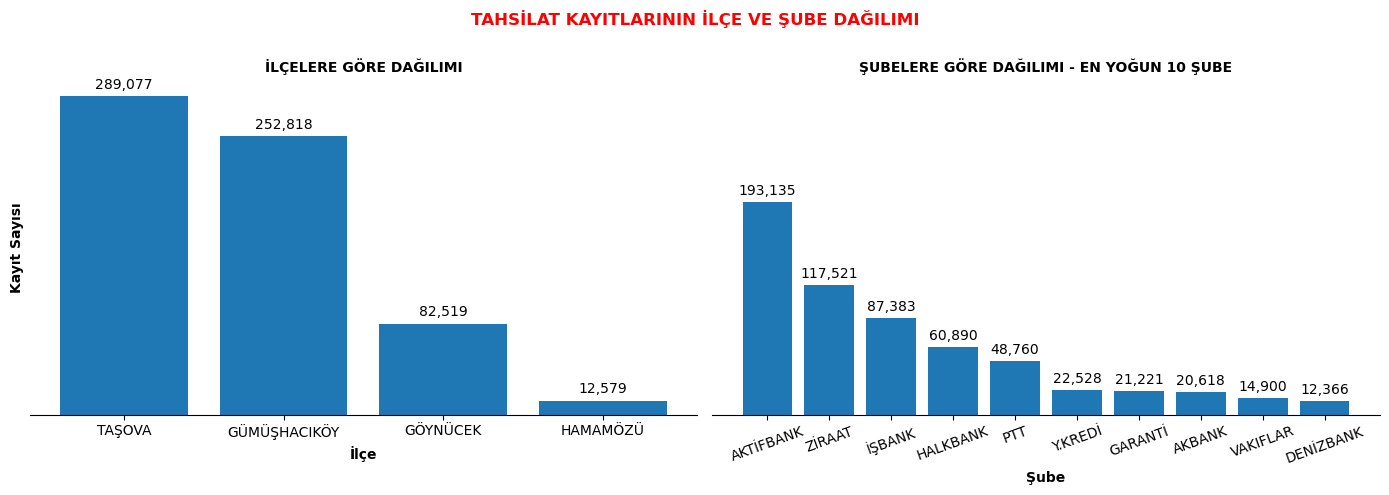

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# İlçe Dağılımı
ilce_dagilim = df_tahsilat["İlçe"].value_counts()

bars = axes[0].bar(ilce_dagilim.index, ilce_dagilim.values)

axes[0].set_title("İLÇELERE GÖRE DAĞILIMI", fontweight="bold",fontsize=10)
axes[0].set_xlabel("İlçe", fontweight="bold",fontsize=10)
axes[0].set_ylabel("Kayıt Sayısı", fontweight="bold",fontsize=10)
axes[0].bar_label(bars, fmt="{:,.0f}", padding=3, fontsize=10)
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["left"].set_visible(False)

# Şube Dağılımı (Top 10)
sube_dagilim = df_tahsilat["Şube"].value_counts().head(10)

bars1 = axes[1].bar(sube_dagilim.index, sube_dagilim.values)

axes[1].set_title("ŞUBELERE GÖRE DAĞILIMI - EN YOĞUN 10 ŞUBE", fontweight="bold",fontsize=10)
axes[1].set_xlabel("Şube", fontweight="bold",fontsize=10)
axes[1].tick_params(axis="x", rotation=20)
axes[1].bar_label(bars1, fmt="{:,.0f}", padding=3, fontsize=10)
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["left"].set_visible(False)

plt.suptitle("TAHSİLAT KAYITLARININ İLÇE VE ŞUBE DAĞILIMI", fontsize=12, fontweight="bold", color="r")
plt.yticks([])
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

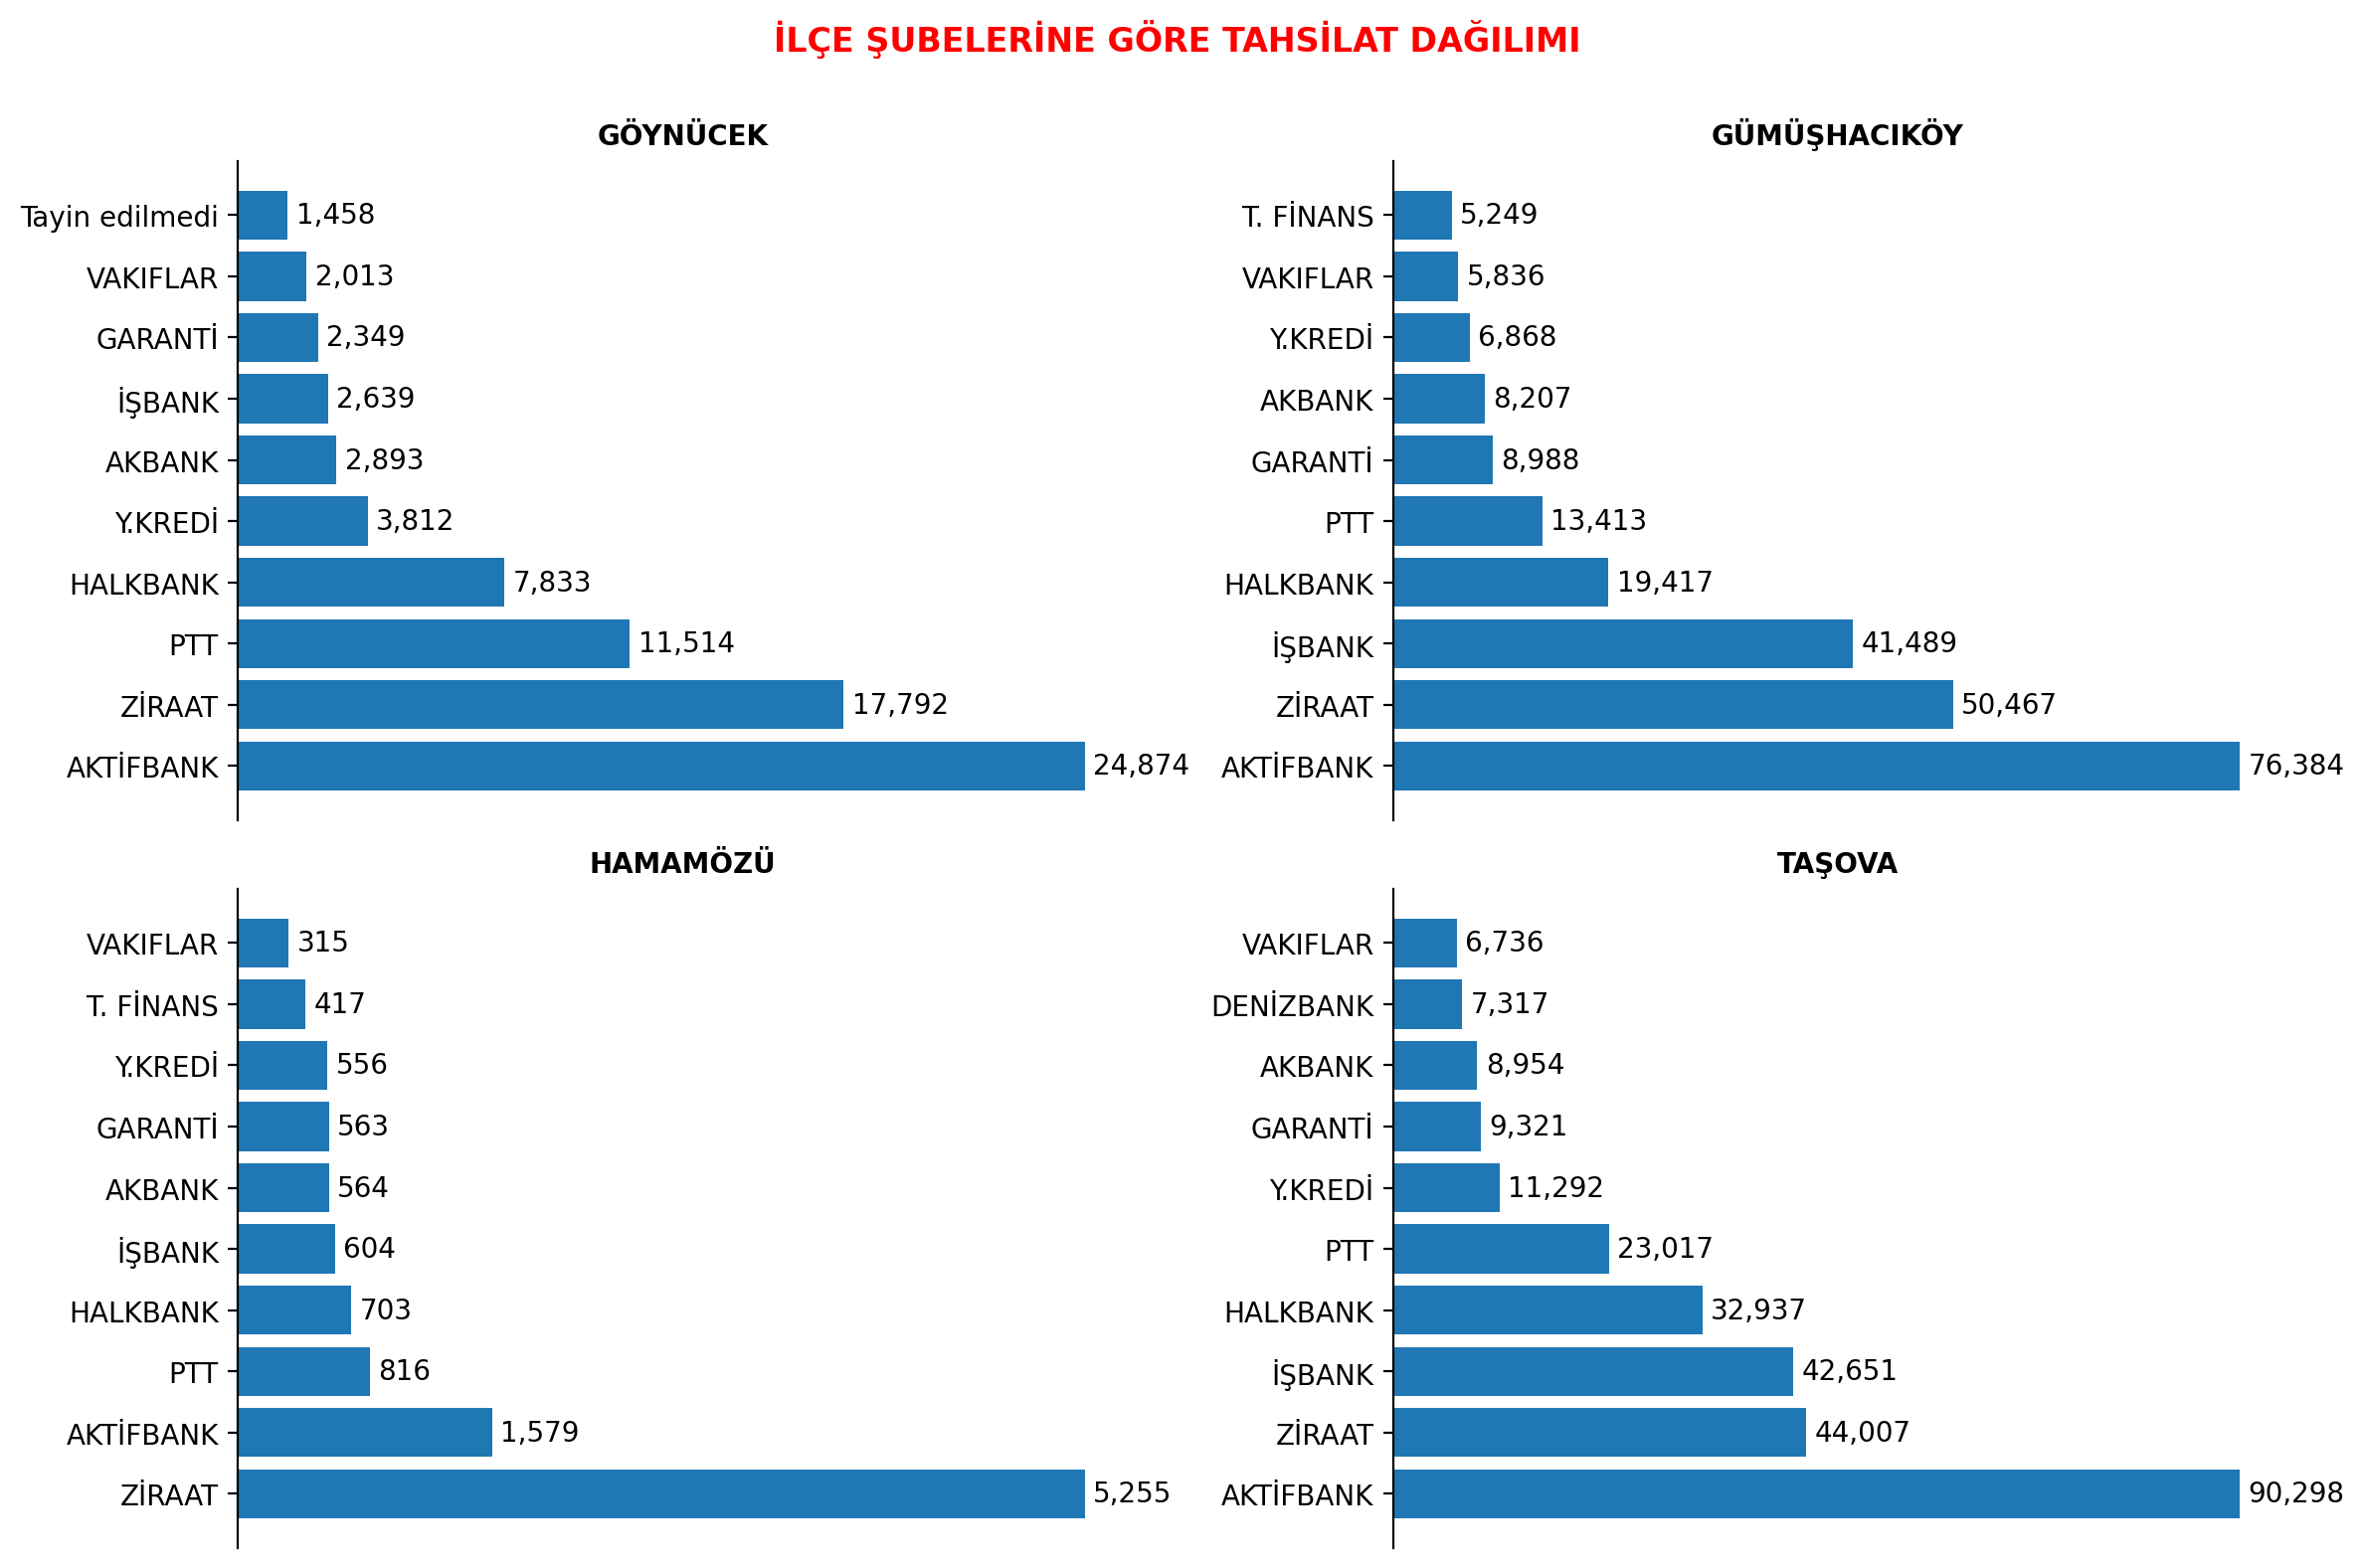

In [7]:
ilce_sube = df_tahsilat.groupby(["İlçe", "Şube"]).size().reset_index(name="Kayıt Sayısı")

ilceler = ilce_sube["İlçe"].unique()

fig, axes = plt.subplots(2,2, figsize=(12, 8),sharex=False, dpi=200)
axes = axes.flatten()

for ax, ilce in zip(axes, ilceler):
    
    data = ilce_sube[ilce_sube["İlçe"] == ilce].sort_values("Kayıt Sayısı", ascending=False).head(10)  
    bars = ax.barh(data["Şube"], data["Kayıt Sayısı"])
    ax.set_title(ilce, fontsize=10, fontweight="bold")
    ax.set_xlabel("")
    ax.bar_label(bars, fmt="{:,.0f}", padding=3, fontsize=10)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_xticks([])
    
plt.suptitle("İLÇE ŞUBELERİNE GÖRE TAHSİLAT DAĞILIMI ",fontsize=12,fontweight="bold", color="r")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### 5. Zamanında ve Geç Ödeme Dağılımı

In [8]:
df_tahsilat_1.columns

Index(['Mali yıl/dönem', 'İl', 'İlçe', 'Söz.hsp.(bağımsız)', 'Hesap Sınıfı',
       'Tahakkuk Tutar', 'Son Ödeme Tarihinden Önceki Tahsilat',
       'Son Ödeme Tarihindeki Tahsilat', 'Son Ödeme (1)', 'Son Ödeme (2)',
       'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)', 'Son Ödeme (6-10)',
       'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)',
       'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 'Son Ödeme (120-150)',
       'Son Ödeme (150-180)', 'Son Ödeme (180+)'],
      dtype='object')

In [9]:
#zamanında ödeme

zamaninda_odeme_kolonlari = ['Son Ödeme Tarihinden Önceki Tahsilat', 'Son Ödeme Tarihindeki Tahsilat']

df_tahsilat_1["Zamaninda_Odeme"] = df_tahsilat_1[zamaninda_odeme_kolonlari].sum(axis=1) > 0

In [10]:
#geç ödeme

gec_odeme_kolonlari = ['Son Ödeme (1)', 'Son Ödeme (2)', 'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)', 'Son Ödeme (6-10)',
                       'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)', 'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 
                       'Son Ödeme (120-150)', 'Son Ödeme (150-180)', 'Son Ödeme (180+)']

df_tahsilat_1["Gec_Odeme"] =df_tahsilat_1[gec_odeme_kolonlari].sum(axis=1) > 0

In [11]:
#oranlar

toplam_kayit = len(df_tahsilat_1)

zamaninda_odeme_kaydi = df_tahsilat_1["Zamaninda_Odeme"].sum()
gec_odeme_kaydi = df_tahsilat_1["Gec_Odeme"].sum()

zamaninda_odeme_orani = zamaninda_odeme_kaydi / toplam_kayit 
gec_odeme_orani = gec_odeme_kaydi / toplam_kayit 

zamaninda_odeme_orani, gec_odeme_orani

(np.float64(0.8602718736922862), np.float64(0.2718453584879342))

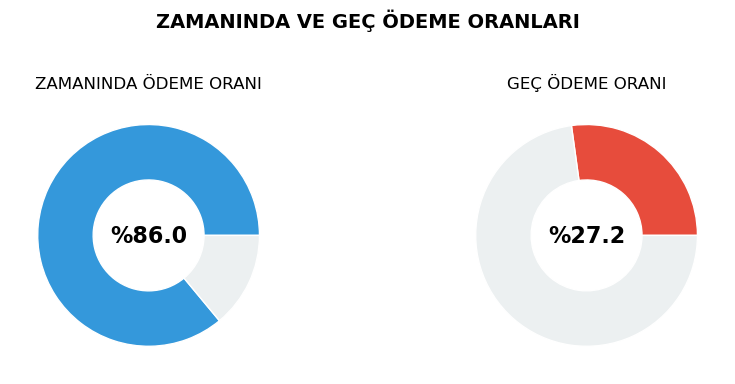

In [12]:
#Pie Chart

fig, axes = plt.subplots(1, 2, figsize=(9,4))

# Zamanında ödeme pie
axes[0].pie([zamaninda_odeme_orani, 1-zamaninda_odeme_orani], colors=["#3498db", "#ecf0f1"], labels=None, autopct=None, wedgeprops={"width": 0.50, "edgecolor": "white"})
axes[0].text(0, 0, f"%{zamaninda_odeme_orani*100:.1f}", ha="center", va="center", fontsize=16, fontweight="bold")
axes[0].set_title("ZAMANINDA ÖDEME ORANI", fontsize=12)
axes[0].axis("off")

# Geç ödeme pie
axes[1].pie([gec_odeme_orani, 1-gec_odeme_orani], colors=["#e74c3c", "#ecf0f1"],  labels=None, autopct=None, wedgeprops={"width": 0.50, "edgecolor": "white"})
axes[1].text(0, 0, f"%{gec_odeme_orani*100:.1f}", ha="center", va="center", fontsize=16, fontweight="bold")
axes[1].set_title("GEÇ ÖDEME ORANI",fontsize=12)
axes[1].axis("off")

plt.suptitle("ZAMANINDA VE GEÇ ÖDEME ORANLARI", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 6. kWh Tüketim Dağılımı - Histogram ve Box Plot 

In [41]:
# Gerekli kolonları al + NA temizle
df_plot = df_tahakkuk_all[["Hesap Sınıfı", "kwh"]].dropna()
# Negatif kWh'leri çıkar
df_plot_positive = df_plot[df_plot["kwh"] >= 0].copy()
# En çok kaydı olan ilk 5 hesap sınıfı (pozitif kWh üzerinden)
top_siniflar = (df_plot_positive["Hesap Sınıfı"].value_counts().head(5).index)

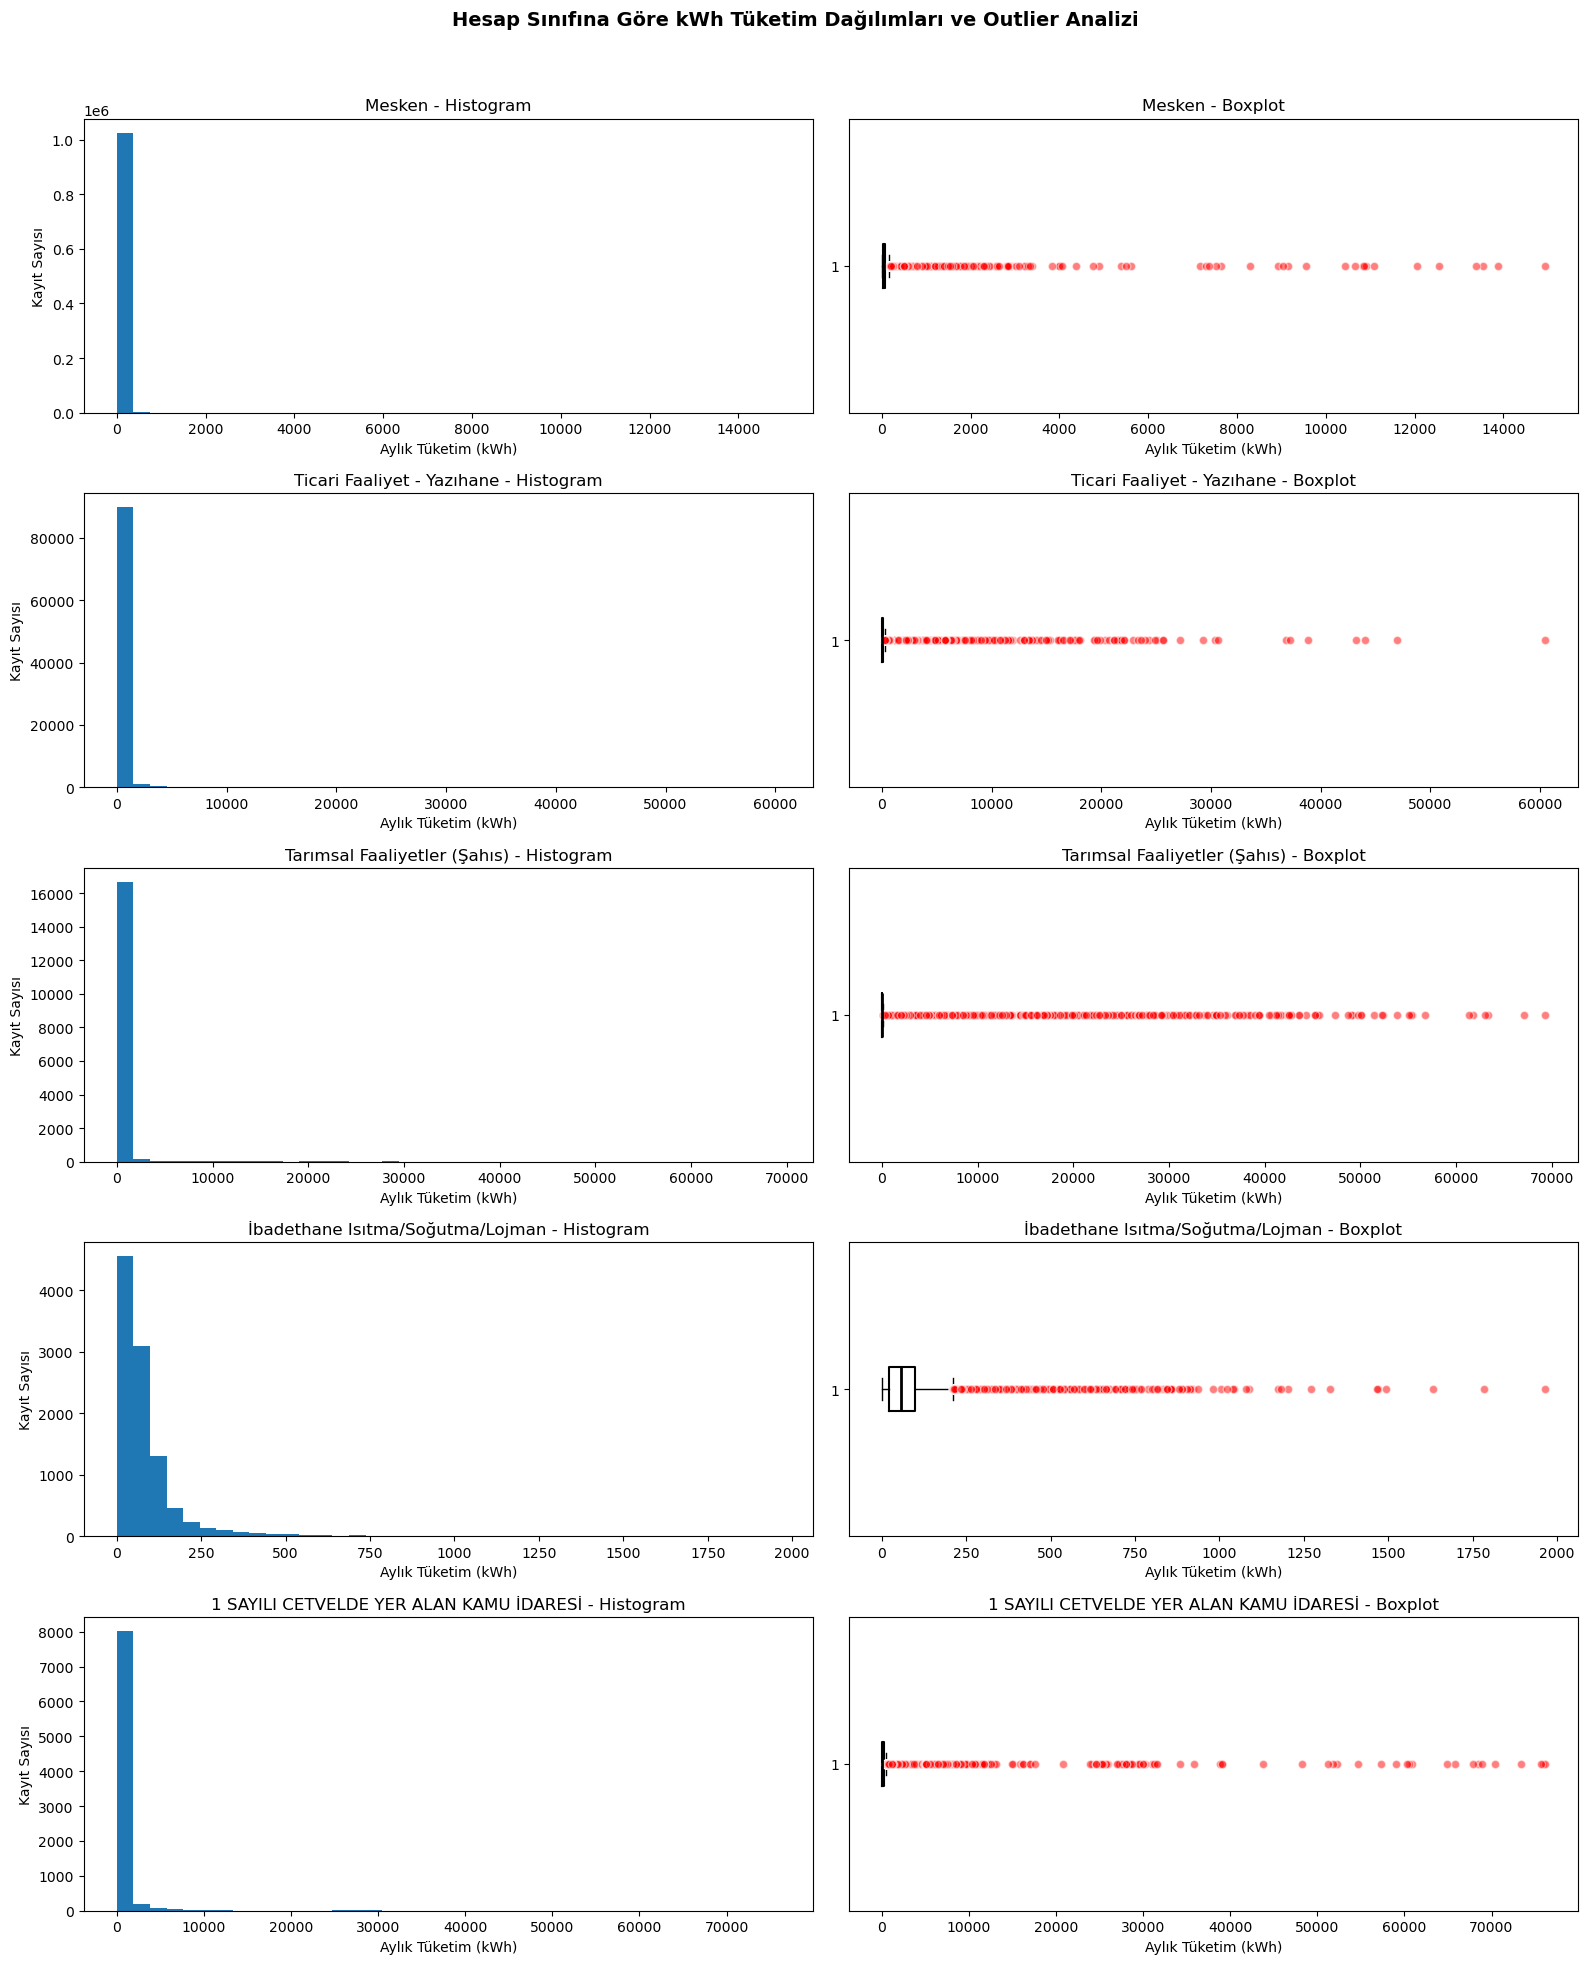

In [57]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(top_siniflar), 2, figsize=(16, 20))

for i, sinif in enumerate(top_siniflar):
    data = df_plot_positive[df_plot_positive["Hesap Sınıfı"] == sinif]["kwh"]

    # IQR hesapla
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Histogram
    axes[i, 0].hist(data, bins=40)
    axes[i, 0].set_title(f"{sinif} - Histogram")
    axes[i, 0].set_xlabel("Aylık Tüketim (kWh)")
    axes[i, 0].set_ylabel("Kayıt Sayısı")

    # Boxplot – outlier'lar özel stil
    axes[i, 1].boxplot(data, vert=False, showfliers=True,  flierprops= dict(marker='o', markerfacecolor='red', 
                                                                            markeredgecolor='white', markersize=6, alpha=0.5),
                       boxprops=dict(linewidth=1.5), medianprops=dict(color='black', linewidth=2))

    axes[i, 1].set_title(f"{sinif} - Boxplot")
    axes[i, 1].set_xlabel("Aylık Tüketim (kWh)")

plt.suptitle( "Hesap Sınıfına Göre kWh Tüketim Dağılımları ve Outlier Analizi", fontsize=14, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [59]:
kwh_ozet = (
    df_plot_positive
    .groupby("Hesap Sınıfı")["kwh"]
    .agg(
        mean_kwh="mean",
        median_kwh="median",
        max_kwh="max",
        kayit_sayisi="count",
        
    )
    .sort_values("kayit_sayisi", ascending=False)
)


kwh_ozet_fmt = kwh_ozet.map(
    lambda x: f"{x:,.0f}" if isinstance(x, (int, float)) else x
)

kwh_ozet_fmt

,mean_kwh,median_kwh,max_kwh,kayit_sayisi
Hesap Sınıfı,,,,
Mesken,56,47,"14,941","1,026,503"
Ticari Faaliyet - Yazıhane,168,42,"60,449","91,285"
Tarımsal Faaliyetler (Şahıs),543,16,"69,308","17,256"
İbadethane Isıtma/Soğutma/Lojman,81,56,"1,965","10,173"
1 SAYILI CETVELDE YER ALAN KAMU İDARESİ,688,24,"76,154","8,500"
Şantiye ve Geçici Aboneler,137,28,"19,241","6,704"
"Bina Ort Kul (Asn,Hidr,Kapıcı Dai vb.)",30,16,467,"3,505"
İbadethane Aydınlatma,32,14,"2,450","3,189"
Şehit Aileleri ve Gaziler,87,77,444,"2,671"
